# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
pip install citipy==0.0.5

In [4]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
from scipy import stats
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Set the list to hold city weather data
lat = []
lon = []
temp = []
cloudiness = []
country = []
date = []
humidity = []
temp_max = []
wind_speed = []
city_number = []
city_name = []


   


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [9]:
#loop through cities to get weather information , city ID and city name
print(f'_________________________________________')
print(f'Beginning of city processing')
print(f'_________________________________________')

for city in cities:


    query_url = f"{url}appid={weather_api_key}&units=Imperial&mode=json&q="
    
    weather_response = requests.get(query_url + city).json()
    print(json.dumps(weather_response, indent=4))
    
    try:
 
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp'])
        temp_max.append(weather_response['main']['temp_max'])
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        wind_speed.append(weather_response['wind']['speed'])
        city_name.append(weather_response['name']) 
        city_number.append(weather_response['id'])   
        #weather_city.append(city)

        print(f'Name: {weather_response["name"]} ID: {weather_response["id"]}') 
    except: KeyError
        
    print(f'City not found. Skipping...') 
    
print('_______________________________________')
print('City weather data retrieval ended')
print('_______________________________________')
        

_________________________________________
Beginning of city processing
_________________________________________
{
    "coord": {
        "lon": -127.4199,
        "lat": 50.6996
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 44.6,
        "feels_like": 39.33,
        "temp_min": 44.6,
        "temp_max": 44.6,
        "pressure": 1003,
        "humidity": 87
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.75,
        "deg": 200
    },
    "rain": {
        "1h": 0.11
    },
    "clouds": {
        "all": 75
    },
    "dt": 1614991545,
    "sys": {
        "type": 1,
        "id": 1011,
        "country": "CA",
        "sunrise": 1614956677,
        "sunset": 1614997070
    },
    "timezone": -28800,
    "id": 6111862,
    "name": "Port Hardy",
    "cod": 200
}
Name: Port Hardy ID: 6111862
City 

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": 25.7167,
        "lat": 66.5
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 12.2,
        "feels_like": 0.41,
        "temp_min": 12.2,
        "temp_max": 12.2,
        "pressure": 1002,
        "humidity": 79
    },
    "visibility": 10000,
    "wind": {
        "speed": 10.36,
        "deg": 200
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991548,
    "sys": {
        "type": 1,
        "id": 1354,
        "country": "FI",
        "sunrise": 1615007534,
        "sunset": 1615045491
    },
    "timezone": 7200,
    "id": 638936,
    "name": "Rovaniemi",
    "cod": 200
}
Name: Rovaniemi ID: 638936
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City n

{
    "coord": {
        "lon": -69.3632,
        "lat": 77.484
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -20.15,
        "feels_like": -28.57,
        "temp_min": -20.15,
        "temp_max": -20.15,
        "pressure": 1022,
        "humidity": 65,
        "sea_level": 1022,
        "grnd_level": 1017
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.55,
        "deg": 44
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991551,
    "sys": {
        "country": "GL",
        "sunrise": 1614946973,
        "sunset": 1614978912
    },
    "timezone": -14400,
    "id": 3831208,
    "name": "Qaanaaq",
    "cod": 200
}
Name: Qaanaaq ID: 3831208
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": 115

{
    "coord": {
        "lon": -57.5575,
        "lat": -38.0023
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 63.43,
        "feels_like": 58.26,
        "temp_min": 62.6,
        "temp_max": 64,
        "pressure": 1013,
        "humidity": 72
    },
    "visibility": 10000,
    "wind": {
        "speed": 11.5,
        "deg": 160
    },
    "clouds": {
        "all": 75
    },
    "dt": 1614991514,
    "sys": {
        "type": 1,
        "id": 8305,
        "country": "AR",
        "sunrise": 1614937141,
        "sunset": 1614983078
    },
    "timezone": -10800,
    "id": 3430863,
    "name": "Mar del Plata",
    "cod": 200
}
Name: Mar del Plata ID: 3430863
City not found. Skipping...
{
    "coord": {
        "lon": -87.4237,
        "lat": 41.5284
    },
    "weather": [
        {
            "id": 803

{
    "coord": {
        "lon": -68.3,
        "lat": -54.8
    },
    "weather": [
        {
            "id": 501,
            "main": "Rain",
            "description": "moderate rain",
            "icon": "10n"
        },
        {
            "id": 300,
            "main": "Drizzle",
            "description": "light intensity drizzle",
            "icon": "09n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 53.6,
        "feels_like": 46.47,
        "temp_min": 53.6,
        "temp_max": 53.6,
        "pressure": 991,
        "humidity": 71
    },
    "visibility": 10000,
    "wind": {
        "speed": 10.36,
        "deg": 360
    },
    "rain": {
        "1h": 1.43
    },
    "clouds": {
        "all": 90
    },
    "dt": 1614991556,
    "sys": {
        "type": 1,
        "id": 8303,
        "country": "AR",
        "sunrise": 1614938714,
        "sunset": 1614986660
    },
    "timezone": -10800,
    "id": 3833367,
    "name": "Ushuaia",
    "cod": 200


{
    "coord": {
        "lon": 128.8694,
        "lat": 71.6872
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -24.54,
        "feels_like": -33.99,
        "temp_min": -24.54,
        "temp_max": -24.54,
        "pressure": 1026,
        "humidity": 86,
        "sea_level": 1026,
        "grnd_level": 1021
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.41,
        "deg": 264
    },
    "clouds": {
        "all": 35
    },
    "dt": 1614991560,
    "sys": {
        "country": "RU",
        "sunrise": 1614983727,
        "sunset": 1615019793
    },
    "timezone": 32400,
    "id": 2015306,
    "name": "Tiksi",
    "cod": 200
}
Name: Tiksi ID: 2015306
City not found. Skipping...
{
    "coord": {
        "lon": -51.7216,
        "lat": 64.1835
    },
    "weather": [
        {
            

{
    "coord": {
        "lon": -12.505,
        "lat": 7.5264
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 78.49,
        "feels_like": 84.02,
        "temp_min": 78.49,
        "temp_max": 78.49,
        "pressure": 1011,
        "humidity": 88,
        "sea_level": 1011,
        "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.21,
        "deg": 233
    },
    "clouds": {
        "all": 55
    },
    "dt": 1614991563,
    "sys": {
        "country": "SL",
        "sunrise": 1615014059,
        "sunset": 1615057309
    },
    "timezone": 0,
    "id": 2409914,
    "name": "Bonthe",
    "cod": 200
}
Name: Bonthe ID: 2409914
City not found. Skipping...
{
    "coord": {
        "lon": -50.0119,
        "lat": -24.7911
    },
    "weather": [
        {
            "id": 804,

{
    "coord": {
        "lon": 146.4167,
        "lat": 68.5333
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -14.26,
        "feels_like": -34.22,
        "temp_min": -14.26,
        "temp_max": -14.26,
        "pressure": 1009,
        "humidity": 87,
        "sea_level": 1009,
        "grnd_level": 1001
    },
    "visibility": 396,
    "wind": {
        "speed": 23.35,
        "deg": 327
    },
    "snow": {
        "1h": 0.11
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991566,
    "sys": {
        "country": "RU",
        "sunrise": 1614978942,
        "sunset": 1615016156
    },
    "timezone": 39600,
    "id": 2126785,
    "name": "Belaya Gora",
    "cod": 200
}
Name: Belaya Gora ID: 2126785
City not found. Skipping...
{
    "coord": {
        "lon": 135.8667,
        "lat": -34.7333
 

{
    "coord": {
        "lon": -6.9861,
        "lat": 52.1514
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 38.34,
        "feels_like": 29.95,
        "temp_min": 37.99,
        "temp_max": 39,
        "pressure": 1034,
        "humidity": 70
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.92,
        "deg": 132
    },
    "clouds": {
        "all": 91
    },
    "dt": 1614991568,
    "sys": {
        "type": 3,
        "id": 2008093,
        "country": "IE",
        "sunrise": 1615014164,
        "sunset": 1615054556
    },
    "timezone": 0,
    "id": 2964492,
    "name": "Dunmore East",
    "cod": 200
}
Name: Dunmore East ID: 2964492
City not found. Skipping...
{
    "coord": {
        "lon": -117.8344,
        "lat": 44.7749
    },
    "weather": [
        {
            "id": 800,


{
    "coord": {
        "lon": 169.8464,
        "lat": -46.2817
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 66,
        "feels_like": 61.48,
        "temp_min": 66,
        "temp_max": 66,
        "pressure": 986,
        "humidity": 51
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.93,
        "deg": 81
    },
    "clouds": {
        "all": 8
    },
    "dt": 1614991572,
    "sys": {
        "type": 3,
        "id": 2000217,
        "country": "NZ",
        "sunrise": 1614968580,
        "sunset": 1615015274
    },
    "timezone": 46800,
    "id": 2208248,
    "name": "Kaitangata",
    "cod": 200
}
Name: Kaitangata ID: 2208248
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": -64.3499,
        "lat"

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": 72.8539,
        "lat": 49.6311
    },
    "weather": [
        {
            "id": 601,
            "main": "Snow",
            "description": "snow",
            "icon": "13n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 17.6,
        "feels_like": -0.63,
        "temp_min": 17.6,
        "temp_max": 17.6,
        "pressure": 1020,
        "humidity": 79
    },
    "visibility": 10000,
    "wind": {
        "speed": 22.37,
        "deg": 200
    },
    "clouds": {
        "all": 75
    },
    "dt": 1614991576,
    "sys": {
        "type": 1,
        "id": 8827,
        "country": "KZ",
        "sunrise": 1614994898,
        "sunset": 1615035505
    },
    "timezone": 21600,
    "id": 1526970,
    "name": "Abay",
    "cod": 200
}
Name: Abay ID: 1526970
City not found. Skipping...
{
    "coord": {
        "lon": 125.4092,
        "lat": -8.9266
   

{
    "coord": {
        "lon": 27.4167,
        "lat": -7.3
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 68.34,
        "feels_like": 72.95,
        "temp_min": 68.34,
        "temp_max": 68.34,
        "pressure": 1010,
        "humidity": 94,
        "sea_level": 1010,
        "grnd_level": 942
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.44,
        "deg": 114
    },
    "clouds": {
        "all": 40
    },
    "dt": 1614991579,
    "sys": {
        "country": "CD",
        "sunrise": 1615004129,
        "sunset": 1615048080
    },
    "timezone": 7200,
    "id": 209598,
    "name": "Manono",
    "cod": 200
}
Name: Manono ID: 209598
City not found. Skipping...
{
    "coord": {
        "lon": 159.9667,
        "lat": 59.1167
    },
    "weather": [
        {
            "id": 802,

{
    "coord": {
        "lon": -159.775,
        "lat": -21.2078
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 84.2,
        "feels_like": 90.54,
        "temp_min": 84.2,
        "temp_max": 84.2,
        "pressure": 1009,
        "humidity": 79
    },
    "visibility": 10000,
    "wind": {
        "speed": 9.22,
        "deg": 270
    },
    "clouds": {
        "all": 20
    },
    "dt": 1614991582,
    "sys": {
        "type": 1,
        "id": 7271,
        "country": "CK",
        "sunrise": 1614962280,
        "sunset": 1615006995
    },
    "timezone": -36000,
    "id": 4035715,
    "name": "Avarua",
    "cod": 200
}
Name: Avarua ID: 4035715
City not found. Skipping...
{
    "coord": {
        "lon": 68.3333,
        "lat": 51.8
    },
    "weather": [
        {
            "id": 600,
            "main"

{
    "coord": {
        "lon": 165.677,
        "lat": -21.6924
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 86,
        "feels_like": 90.84,
        "temp_min": 86,
        "temp_max": 86,
        "pressure": 991,
        "humidity": 66
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.05,
        "deg": 20
    },
    "clouds": {
        "all": 75
    },
    "dt": 1614991584,
    "sys": {
        "type": 1,
        "id": 7344,
        "country": "NC",
        "sunrise": 1614970560,
        "sunset": 1615015296
    },
    "timezone": 39600,
    "id": 2140466,
    "name": "Moindou",
    "cod": 200
}
Name: Moindou ID: 2140466
City not found. Skipping...
{
    "coord": {
        "lon": 178.4167,
        "lat": 69.3833
    },
    "weather": [
        {
            "id": 804,
            "main":

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": -79.9342,
        "lat": -6.8367
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.78,
        "feels_like": 73.29,
        "temp_min": 75,
        "temp_max": 77,
        "pressure": 1009,
        "humidity": 73
    },
    "visibility": 10000,
    "wind": {
        "speed": 14.97,
        "deg": 180
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991589,
    "sys": {
        "type": 1,
        "id": 8680,
        "country": "PE",
        "sunrise": 1614943507,
        "sunset": 1614987451
    },
    "timezone": -18000,
    "id": 3693584,
    "name": "Pimentel",
    "cod": 200
}
Name: Pimentel ID: 3693584
Ci

{
    "coord": {
        "lon": -25.4333,
        "lat": 37.7167
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 53.6,
        "feels_like": 51.28,
        "temp_min": 53.6,
        "temp_max": 53.6,
        "pressure": 1031,
        "humidity": 82
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.44,
        "deg": 10
    },
    "clouds": {
        "all": 20
    },
    "dt": 1614991592,
    "sys": {
        "type": 1,
        "id": 6899,
        "country": "PT",
        "sunrise": 1614931655,
        "sunset": 1614973146
    },
    "timezone": -3600,
    "id": 3372472,
    "name": "Vila Franca do Campo",
    "cod": 200
}
Name: Vila Franca do Campo ID: 3372472
City not found. Skipping...
{
    "coord": {
        "lon": 145.5913,
        "lat": -38.6044
    },
    "weather": [
        {
           

{
    "coord": {
        "lon": 35.5833,
        "lat": 6.9833
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 67.64,
        "feels_like": 66.78,
        "temp_min": 67.64,
        "temp_max": 67.64,
        "pressure": 1009,
        "humidity": 58,
        "sea_level": 1009,
        "grnd_level": 852
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.84,
        "deg": 100
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991595,
    "sys": {
        "country": "ET",
        "sunrise": 1615002509,
        "sunset": 1615045781
    },
    "timezone": 10800,
    "id": 330534,
    "name": "M\u012bzan Tefer\u012b",
    "cod": 200
}
Name: Mīzan Teferī ID: 330534
City not found. Skipping...
{
    "coord": {
        "lon": -124.2243,
        "lat": 43.4065
    },
    "weather": [
      

{
    "coord": {
        "lon": -169.9187,
        "lat": -19.0595
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 84.2,
        "feels_like": 90.54,
        "temp_min": 84.2,
        "temp_max": 84.2,
        "pressure": 1011,
        "humidity": 79
    },
    "visibility": 10000,
    "wind": {
        "speed": 9.22,
        "deg": 220
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991598,
    "sys": {
        "type": 1,
        "id": 7306,
        "country": "NU",
        "sunrise": 1614964778,
        "sunset": 1615009365
    },
    "timezone": -39600,
    "id": 4036284,
    "name": "Alofi",
    "cod": 200
}
Name: Alofi ID: 4036284
City not found. Skipping...
{
    "coord": {
        "lon": -93.218,
        "lat": 45.0205
    },
    "weather": [
        {
            "id": 800,
          

{
    "coord": {
        "lon": 48.8,
        "lat": -19.9
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 73.63,
        "feels_like": 80.85,
        "temp_min": 73.63,
        "temp_max": 73.63,
        "pressure": 1005,
        "humidity": 93,
        "sea_level": 1005,
        "grnd_level": 1005
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.08,
        "deg": 255
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991601,
    "sys": {
        "country": "MG",
        "sunrise": 1614998669,
        "sunset": 1615043278
    },
    "timezone": 10800,
    "id": 1062553,
    "name": "Mahanoro",
    "cod": 200
}
Name: Mahanoro ID: 1062553
City not found. Skipping...
{
    "coord": {
        "lon": 25.5701,
        "lat": -33.918
    },
    "weather": [
        {
            "id":

{
    "coord": {
        "lon": 119.7848,
        "lat": -3.9443
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 84.51,
        "feels_like": 92.5,
        "temp_min": 84.51,
        "temp_max": 84.51,
        "pressure": 1013,
        "humidity": 68,
        "sea_level": 1013,
        "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.95,
        "deg": 139
    },
    "clouds": {
        "all": 72
    },
    "dt": 1614991605,
    "sys": {
        "country": "ID",
        "sunrise": 1614982044,
        "sunset": 1615025835
    },
    "timezone": 28800,
    "id": 1629965,
    "name": "Tanete",
    "cod": 200
}
Name: Tanete ID: 1629965
City not found. Skipping...
{
    "coord": {
        "lon": -66.8654,
        "lat": 50.0334
    },
    "weather": [
        {
            "id": 

{
    "coord": {
        "lon": -165.4064,
        "lat": 64.5011
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 14.68,
        "feels_like": 2.52,
        "temp_min": 14,
        "temp_max": 15.8,
        "pressure": 993,
        "humidity": 86
    },
    "visibility": 10000,
    "wind": {
        "speed": 11.5,
        "deg": 180
    },
    "clouds": {
        "all": 20
    },
    "dt": 1614991607,
    "sys": {
        "type": 1,
        "id": 7770,
        "country": "US",
        "sunrise": 1614966863,
        "sunset": 1615005115
    },
    "timezone": -32400,
    "id": 5870133,
    "name": "Nome",
    "cod": 200
}
Name: Nome ID: 5870133
City not found. Skipping...
{
    "coord": {
        "lon": -46.05,
        "lat": 60.9167
    },
    "weather": [
        {
            "id": 803,
            "main": "Cl

{
    "coord": {
        "lon": 112.4,
        "lat": 66.4167
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -9.11,
        "feels_like": -20.18,
        "temp_min": -9.11,
        "temp_max": -9.11,
        "pressure": 1016,
        "humidity": 88,
        "sea_level": 1016,
        "grnd_level": 977
    },
    "visibility": 4676,
    "wind": {
        "speed": 7.76,
        "deg": 156
    },
    "clouds": {
        "all": 98
    },
    "dt": 1614991610,
    "sys": {
        "country": "RU",
        "sunrise": 1614986775,
        "sunset": 1615024648
    },
    "timezone": 32400,
    "id": 2014624,
    "name": "Udachny",
    "cod": 200
}
Name: Udachny ID: 2014624
City not found. Skipping...
{
    "coord": {
        "lon": -152.4072,
        "lat": 57.79
    },
    "weather": [
        {
            "id": 

{
    "coord": {
        "lon": 96.37,
        "lat": 61.67
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 18.72,
        "feels_like": 11.28,
        "temp_min": 18.72,
        "temp_max": 18.72,
        "pressure": 1007,
        "humidity": 94,
        "sea_level": 1007,
        "grnd_level": 988
    },
    "visibility": 755,
    "wind": {
        "speed": 3.89,
        "deg": 176
    },
    "snow": {
        "1h": 0.25
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991612,
    "sys": {
        "country": "RU",
        "sunrise": 1614990086,
        "sunset": 1615029031
    },
    "timezone": 25200,
    "id": 1510689,
    "name": "Baykit",
    "cod": 200
}
Name: Baykit ID: 1510689
City not found. Skipping...
{
    "coord": {
        "lon": 86.1778,
        "lat": 69.4058
    },
    "weather": [


{
    "coord": {
        "lon": 8.4765,
        "lat": 35.8567
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 44.6,
        "feels_like": 39.33,
        "temp_min": 44.6,
        "temp_max": 44.6,
        "pressure": 1020,
        "humidity": 76
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.61,
        "deg": 120
    },
    "clouds": {
        "all": 20
    },
    "dt": 1614991614,
    "sys": {
        "type": 1,
        "id": 1075,
        "country": "TN",
        "sunrise": 1615009776,
        "sunset": 1615051523
    },
    "timezone": 3600,
    "id": 2469252,
    "name": "Menzel Salem",
    "cod": 200
}
Name: Menzel Salem ID: 2469252
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": 27.4667,
      

{
    "coord": {
        "lon": 31.3694,
        "lat": -10.1732
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 63.12,
        "feels_like": 65.55,
        "temp_min": 63.12,
        "temp_max": 63.12,
        "pressure": 1012,
        "humidity": 97,
        "sea_level": 1012,
        "grnd_level": 862
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.04,
        "deg": 298
    },
    "rain": {
        "1h": 0.33
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991618,
    "sys": {
        "country": "ZM",
        "sunrise": 1615003110,
        "sunset": 1615047202
    },
    "timezone": 7200,
    "id": 904241,
    "name": "Mungwi",
    "cod": 200
}
Name: Mungwi ID: 904241
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{


{
    "coord": {
        "lon": 114.85,
        "lat": -3.4167
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 78.8,
        "feels_like": 88.41,
        "temp_min": 78.8,
        "temp_max": 78.8,
        "pressure": 1011,
        "humidity": 94
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.38,
        "deg": 9
    },
    "clouds": {
        "all": 20
    },
    "dt": 1614991621,
    "sys": {
        "type": 1,
        "id": 9360,
        "country": "ID",
        "sunrise": 1614983241,
        "sunset": 1615027007
    },
    "timezone": 28800,
    "id": 1636022,
    "name": "Martapura",
    "cod": 200
}
Name: Martapura ID: 1636022
City not found. Skipping...
{
    "coord": {
        "lon": 15.1594,
        "lat": -26.6481
    },
    "weather": [
        {
            "id": 800,
            "m

{
    "coord": {
        "lon": 26.4,
        "lat": 46.4333
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 35.01,
        "feels_like": 26.04,
        "temp_min": 35.01,
        "temp_max": 35.01,
        "pressure": 1018,
        "humidity": 59
    },
    "visibility": 282,
    "wind": {
        "speed": 7.4,
        "deg": 9
    },
    "snow": {
        "1h": 0.48
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991623,
    "sys": {
        "type": 3,
        "id": 2033571,
        "country": "RO",
        "sunrise": 1615005880,
        "sunset": 1615046817
    },
    "timezone": 7200,
    "id": 686090,
    "name": "As\u0103u",
    "cod": 200
}
Name: Asău ID: 686090
City not found. Skipping...
{
    "coord": {
        "lon": -124.1573,
        "lat": 40.5982
    },
    "weather": [
        {
    

{
    "coord": {
        "lon": 75.092,
        "lat": 29.1018
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 63.41,
        "feels_like": 56.88,
        "temp_min": 63.41,
        "temp_max": 63.41,
        "pressure": 1011,
        "humidity": 28,
        "sea_level": 1011,
        "grnd_level": 987
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.68,
        "deg": 355
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991626,
    "sys": {
        "country": "IN",
        "sunrise": 1614993595,
        "sunset": 1615035734
    },
    "timezone": 19800,
    "id": 1276330,
    "name": "Karanpura",
    "cod": 200
}
Name: Karanpura ID: 1276330
City not found. Skipping...
{
    "coord": {
        "lon": 55.4781,
        "lat": -21.3393
    },
    "weather": [
        {
            "id": 80

{
    "coord": {
        "lon": 30.4164,
        "lat": 31.4044
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 55.4,
        "feels_like": 52.99,
        "temp_min": 55.4,
        "temp_max": 55.4,
        "pressure": 1024,
        "humidity": 76
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.49,
        "deg": 130
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991629,
    "sys": {
        "type": 1,
        "id": 2511,
        "country": "EG",
        "sunrise": 1615004376,
        "sunset": 1615046393
    },
    "timezone": 7200,
    "id": 350203,
    "name": "Rosetta",
    "cod": 200
}
Name: Rosetta ID: 350203
City not found. Skipping...
{
    "coord": {
        "lon": -53.4616,
        "lat": -33.6971
    },
    "weather": [
        {
            "id": 804,
            "main": 

{
    "coord": {
        "lon": 141.4333,
        "lat": -31.95
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 69.8,
        "feels_like": 62.49,
        "temp_min": 69.8,
        "temp_max": 69.8,
        "pressure": 1014,
        "humidity": 30
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.05,
        "deg": 120
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991633,
    "sys": {
        "type": 1,
        "id": 9491,
        "country": "AU",
        "sunrise": 1614976046,
        "sunset": 1615021444
    },
    "timezone": 37800,
    "id": 2173911,
    "name": "Broken Hill",
    "cod": 200
}
Name: Broken Hill ID: 2173911
City not found. Skipping...
{
    "coord": {
        "lon": 122.6711,
        "lat": 10.9995
    },
    "weather": [
        {
            "id": 500,
          

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": 141.3028,
        "lat": -2.6741
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 84.72,
        "feels_like": 89.31,
        "temp_min": 84.72,
        "temp_max": 84.72,
        "pressure": 1010,
        "humidity": 66,
        "sea_level": 1010,
        "grnd_level": 1007
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.34,
        "deg": 304
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991635,
    "sys": {
        "country": "PG",
        "sunrise": 1614976911,
        "sunset": 1615020641
    },
    "timezone": 36000,
    "id": 2084442,
    "name": "Vanimo",
    "cod": 200
}
Name: Vanimo ID: 2084442
City not found. Skipping...
{
    "coord": {
        "lon":

{
    "coord": {
        "lon": 80.8572,
        "lat": 59.0556
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 20.7,
        "feels_like": 11.16,
        "temp_min": 20.7,
        "temp_max": 20.7,
        "pressure": 1002,
        "humidity": 98,
        "sea_level": 1002,
        "grnd_level": 995
    },
    "visibility": 1449,
    "wind": {
        "speed": 8.1,
        "deg": 178
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991639,
    "sys": {
        "country": "RU",
        "sunrise": 1614993576,
        "sunset": 1615032986
    },
    "timezone": 25200,
    "id": 1504382,
    "name": "Kargasok",
    "cod": 200
}
Name: Kargasok ID: 1504382
City not found. Skipping...
{
    "coord": {
        "lon": -113.5841,
        "lat": 37.1041
    },
    "weather": [
        {
            "id"

{
    "coord": {
        "lon": -17.3389,
        "lat": 66.0449
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 37.4,
        "feels_like": 30.33,
        "temp_min": 37.4,
        "temp_max": 37.4,
        "pressure": 1022,
        "humidity": 75
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.75,
        "deg": 170
    },
    "clouds": {
        "all": 90
    },
    "dt": 1614991642,
    "sys": {
        "type": 1,
        "id": 83,
        "country": "IS",
        "sunrise": 1615017782,
        "sunset": 1615055906
    },
    "timezone": 0,
    "id": 2629833,
    "name": "Husavik",
    "cod": 200
}
Name: Husavik ID: 2629833
City not found. Skipping...
{
    "coord": {
        "lon": 49.8164,
        "lat": 7.9803
    },
    "weather": [
        {
            "id": 803,
            "main

{
    "coord": {
        "lon": 96.11,
        "lat": 52.4675
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 12.33,
        "feels_like": 5.09,
        "temp_min": 12.33,
        "temp_max": 12.33,
        "pressure": 1033,
        "humidity": 94,
        "sea_level": 1033,
        "grnd_level": 921
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.68,
        "deg": 152
    },
    "clouds": {
        "all": 92
    },
    "dt": 1614991645,
    "sys": {
        "country": "RU",
        "sunrise": 1614989478,
        "sunset": 1615029764
    },
    "timezone": 25200,
    "id": 1489401,
    "name": "Toora-Khem",
    "cod": 200
}
Name: Toora-Khem ID: 1489401
City not found. Skipping...
{
    "coord": {
        "lon": 87.3167,
        "lat": 44.0167
    },
    "weather": [
        {
            "

{
    "coord": {
        "lon": -103.6833,
        "lat": 18.7333
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.2,
        "feels_like": 73.72,
        "temp_min": 75.2,
        "temp_max": 75.2,
        "pressure": 1012,
        "humidity": 69
    },
    "visibility": 9656,
    "wind": {
        "speed": 11.5,
        "deg": 210
    },
    "clouds": {
        "all": 1
    },
    "dt": 1614991648,
    "sys": {
        "type": 1,
        "id": 7116,
        "country": "MX",
        "sunrise": 1614949845,
        "sunset": 1614992510
    },
    "timezone": -21600,
    "id": 4013679,
    "name": "Coahuayana Viejo",
    "cod": 200
}
Name: Coahuayana Viejo ID: 4013679
City not found. Skipping...
{
    "coord": {
        "lon": 41.6925,
        "lat": 13.9297
    },
    "weather": [
        {
            "id": 804,

{
    "coord": {
        "lon": 124.284,
        "lat": -9.8607
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 78.35,
        "feels_like": 84.38,
        "temp_min": 78.35,
        "temp_max": 78.35,
        "pressure": 1010,
        "humidity": 70,
        "sea_level": 1010,
        "grnd_level": 918
    },
    "visibility": 10000,
    "wind": {
        "speed": 0.89,
        "deg": 225
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991651,
    "sys": {
        "country": "ID",
        "sunrise": 1614980818,
        "sunset": 1615024903
    },
    "timezone": 28800,
    "id": 1626703,
    "name": "Soe",
    "cod": 200
}
Name: Soe ID: 1626703
City not found. Skipping...
{
    "coord": {
        "lon": -57.5333,
        "lat": -25.3333
    },
    "weather": [
        {
            "id": 803,
       

{
    "coord": {
        "lon": 24.6134,
        "lat": 49.9145
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 22.06,
        "feels_like": 14.58,
        "temp_min": 21.2,
        "temp_max": 23,
        "pressure": 1024,
        "humidity": 93
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.47,
        "deg": 310
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991654,
    "sys": {
        "type": 1,
        "id": 8909,
        "country": "UA",
        "sunrise": 1615006473,
        "sunset": 1615047081
    },
    "timezone": 7200,
    "id": 704277,
    "name": "Krasne",
    "cod": 200
}
Name: Krasne ID: 704277
City not found. Skipping...
{
    "coord": {
        "lon": -55.1483,
        "lat": 47.1666
    },
    "weather": [
        {
            "id": 804,
            "main": "Clo

{
    "coord": {
        "lon": 31.0167,
        "lat": 61.7667
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 9.48,
        "feels_like": 1.62,
        "temp_min": 9.48,
        "temp_max": 9.48,
        "pressure": 1014,
        "humidity": 96,
        "sea_level": 1014,
        "grnd_level": 1011
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.53,
        "deg": 284
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991657,
    "sys": {
        "country": "RU",
        "sunrise": 1615005745,
        "sunset": 1615044736
    },
    "timezone": 10800,
    "id": 532825,
    "name": "Lyaskelya",
    "cod": 200
}
Name: Lyaskelya ID: 532825
City not found. Skipping...
{
    "coord": {
        "lon": 57.6142,
        "lat": -19.9842
    },
    "weather": [
        {
            "id": 801,
 

{
    "coord": {
        "lon": 119.9327,
        "lat": 54.4253
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -11.02,
        "feels_like": -18.22,
        "temp_min": -11.02,
        "temp_max": -11.02,
        "pressure": 1034,
        "humidity": 83,
        "sea_level": 1034,
        "grnd_level": 949
    },
    "visibility": 10000,
    "wind": {
        "speed": 0.78,
        "deg": 264
    },
    "clouds": {
        "all": 84
    },
    "dt": 1614991659,
    "sys": {
        "country": "RU",
        "sunrise": 1614983887,
        "sunset": 1615023921
    },
    "timezone": 32400,
    "id": 2014836,
    "name": "Tupik",
    "cod": 200
}
Name: Tupik ID: 2014836
City not found. Skipping...
{
    "coord": {
        "lon": -8.6151,
        "lat": 41.5388
    },
    "weather": [
        {
            "id":

{
    "coord": {
        "lon": -55.8661,
        "lat": -1.7656
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 76.42,
        "feels_like": 84.43,
        "temp_min": 76.42,
        "temp_max": 76.42,
        "pressure": 1010,
        "humidity": 91,
        "sea_level": 1010,
        "grnd_level": 1007
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.73,
        "deg": 86
    },
    "clouds": {
        "all": 74
    },
    "dt": 1614991662,
    "sys": {
        "country": "BR",
        "sunrise": 1614937859,
        "sunset": 1614981548
    },
    "timezone": -10800,
    "id": 3393471,
    "name": "Oriximin\u00e1",
    "cod": 200
}
Name: Oriximiná ID: 3393471
City not found. Skipping...
{
    "coord": {
        "lon": -87.6901,
        "lat": 42.0411
    },
    "weather": [
        {
      

{
    "coord": {
        "lon": 33.0549,
        "lat": 66.27
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 8.78,
        "feels_like": -0.26,
        "temp_min": 8.78,
        "temp_max": 8.78,
        "pressure": 1007,
        "humidity": 94,
        "sea_level": 1007,
        "grnd_level": 1005
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.5,
        "deg": 224
    },
    "clouds": {
        "all": 67
    },
    "dt": 1614991665,
    "sys": {
        "country": "RU",
        "sunrise": 1615005748,
        "sunset": 1615043755
    },
    "timezone": 10800,
    "id": 567589,
    "name": "Chupa",
    "cod": 200
}
Name: Chupa ID: 567589
City not found. Skipping...
{
    "coord": {
        "lon": -53.0869,
        "lat": -32.2375
    },
    "weather": [
        {
            "id": 802,
    

{
    "coord": {
        "lon": 42.5053,
        "lat": 18.2164
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 58.15,
        "feels_like": 53.4,
        "temp_min": 57.2,
        "temp_max": 59,
        "pressure": 1026,
        "humidity": 41
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.8,
        "deg": 73
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991668,
    "sys": {
        "type": 1,
        "id": 7396,
        "country": "SA",
        "sunrise": 1615001119,
        "sunset": 1615043848
    },
    "timezone": 10800,
    "id": 110690,
    "name": "Abh\u0101",
    "cod": 200
}
Name: Abhā ID: 110690
City not found. Skipping...
{
    "coord": {
        "lon": 45.7622,
        "lat": 64.8989
    },
    "weather": [
        {
            "id": 804,
            "main": "Cloud

{
    "coord": {
        "lon": 101.5036,
        "lat": 54.3419
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 12.9,
        "feels_like": 4.23,
        "temp_min": 12.9,
        "temp_max": 12.9,
        "pressure": 1026,
        "humidity": 95,
        "sea_level": 1026,
        "grnd_level": 959
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.35,
        "deg": 182
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991671,
    "sys": {
        "country": "RU",
        "sunrise": 1614988298,
        "sunset": 1615028356
    },
    "timezone": 28800,
    "id": 2021093,
    "name": "Kuytun",
    "cod": 200
}
Name: Kuytun ID: 2021093
City not found. Skipping...
{
    "coord": {
        "lon": 79.6167,
        "lat": 17.15
    },
    "weather": [
        {
            "id": 800,

{
    "coord": {
        "lon": -59.7968,
        "lat": 3.3803
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 80.8,
        "feels_like": 80.28,
        "temp_min": 80.8,
        "temp_max": 80.8,
        "pressure": 1011,
        "humidity": 65,
        "sea_level": 1011,
        "grnd_level": 1001
    },
    "visibility": 10000,
    "wind": {
        "speed": 12.66,
        "deg": 65
    },
    "clouds": {
        "all": 33
    },
    "dt": 1614991673,
    "sys": {
        "country": "GY",
        "sunrise": 1614938930,
        "sunset": 1614982363
    },
    "timezone": -14400,
    "id": 3379316,
    "name": "Lethem",
    "cod": 200
}
Name: Lethem ID: 3379316
City not found. Skipping...
{
    "coord": {
        "lon": 100.4767,
        "lat": 7.0084
    },
    "weather": [
        {
            "id": 

{
    "coord": {
        "lon": -78.5906,
        "lat": 9.4428
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 77.36,
        "feels_like": 78.96,
        "temp_min": 77.36,
        "temp_max": 77.36,
        "pressure": 1011,
        "humidity": 78,
        "sea_level": 1011,
        "grnd_level": 1011
    },
    "visibility": 10000,
    "wind": {
        "speed": 10.65,
        "deg": 6
    },
    "clouds": {
        "all": 0
    },
    "dt": 1614991677,
    "sys": {
        "country": "PA",
        "sunrise": 1614943589,
        "sunset": 1614986724
    },
    "timezone": -18000,
    "id": 3703946,
    "name": "Nargan\u00e1",
    "cod": 200
}
Name: Narganá ID: 3703946
City not found. Skipping...
{
    "coord": {
        "lon": 35.3833,
        "lat": -4.0667
    },
    "weather": [
        {
            "id": 

{
    "coord": {
        "lon": 111.5,
        "lat": 66
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -9.27,
        "feels_like": -20.49,
        "temp_min": -9.27,
        "temp_max": -9.27,
        "pressure": 1016,
        "humidity": 88,
        "sea_level": 1016,
        "grnd_level": 954
    },
    "visibility": 1773,
    "wind": {
        "speed": 8.03,
        "deg": 170
    },
    "clouds": {
        "all": 96
    },
    "dt": 1614991679,
    "sys": {
        "country": "RU",
        "sunrise": 1614986937,
        "sunset": 1615024919
    },
    "timezone": 32400,
    "id": 2027296,
    "name": "Aykhal",
    "cod": 200
}
Name: Aykhal ID: 2027296
City not found. Skipping...
{
    "coord": {
        "lon": -58.6502,
        "lat": 51.226
    },
    "weather": [
        {
            "id": 802,
  

{
    "coord": {
        "lon": 121.6247,
        "lat": 63.7553
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -17.63,
        "feels_like": -26.97,
        "temp_min": -17.63,
        "temp_max": -17.63,
        "pressure": 1025,
        "humidity": 87,
        "sea_level": 1025,
        "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.38,
        "deg": 130
    },
    "clouds": {
        "all": 58
    },
    "dt": 1614991682,
    "sys": {
        "country": "RU",
        "sunrise": 1614984249,
        "sunset": 1615022748
    },
    "timezone": 32400,
    "id": 2013392,
    "name": "Vilyuysk",
    "cod": 200
}
Name: Vilyuysk ID: 2013392
City not found. Skipping...
{
    "coord": {
        "lon": -114.769,
        "lat": 55.2834
    },
    "weather": [
        {
         

{
    "coord": {
        "lon": 100.3543,
        "lat": -0.9492
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 77,
        "feels_like": 83.71,
        "temp_min": 77,
        "temp_max": 77,
        "pressure": 1010,
        "humidity": 88
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.61,
        "deg": 360
    },
    "clouds": {
        "all": 40
    },
    "dt": 1614991686,
    "sys": {
        "type": 1,
        "id": 9423,
        "country": "ID",
        "sunrise": 1614986779,
        "sunset": 1615030425
    },
    "timezone": 25200,
    "id": 1633419,
    "name": "Padang",
    "cod": 200
}
Name: Padang ID: 1633419
City not found. Skipping...
{
    "coord": {
        "lon": 119.4706,
        "lat": 4.6533
    },
    "weather": [
        {
            "id": 801,
            "main

{
    "coord": {
        "lon": -112.7186,
        "lat": 52.3168
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 39.2,
        "feels_like": 27.41,
        "temp_min": 39.2,
        "temp_max": 39.2,
        "pressure": 1007,
        "humidity": 93,
        "sea_level": 1007,
        "grnd_level": 912
    },
    "visibility": 10000,
    "wind": {
        "speed": 16.11,
        "deg": 150
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991688,
    "sys": {
        "type": 1,
        "id": 609,
        "country": "CA",
        "sunrise": 1614953245,
        "sunset": 1614993446
    },
    "timezone": -25200,
    "id": 6156307,
    "name": "Stettler",
    "cod": 200
}
Name: Stettler ID: 6156307
City not found. Skipping...
{
    "coord": {
        "lon": -85.452,
        "lat": 10.1483
    },
 

{
    "coord": {
        "lon": 144.2697,
        "lat": 44.0213
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 23.5,
        "feels_like": 8.13,
        "temp_min": 23,
        "temp_max": 24.01,
        "pressure": 1016,
        "humidity": 86
    },
    "visibility": 2400,
    "wind": {
        "speed": 18.41,
        "deg": 350
    },
    "clouds": {
        "all": 75
    },
    "dt": 1614991691,
    "sys": {
        "type": 1,
        "id": 7975,
        "country": "JP",
        "sunrise": 1614977523,
        "sunset": 1615018606
    },
    "timezone": 32400,
    "id": 2130741,
    "name": "Abashiri",
    "cod": 200
}
Name: Abashiri ID: 2130741
City not found. Skipping...
{
    "coord": {
        "lon": 23.4333,
        "lat": -3.4833
    },
    "weather": [
        {
            "id": 500,
            "main

{
    "coord": {
        "lon": -60.1458,
        "lat": -12.7406
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 70.21,
        "feels_like": 76.82,
        "temp_min": 70.21,
        "temp_max": 70.21,
        "pressure": 1012,
        "humidity": 97,
        "sea_level": 1012,
        "grnd_level": 945
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.21,
        "deg": 184
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991694,
    "sys": {
        "country": "BR",
        "sunrise": 1614938603,
        "sunset": 1614982858
    },
    "timezone": -14400,
    "id": 3924679,
    "name": "Vilhena",
    "cod": 200
}
Name: Vilhena ID: 3924679
City not found. Skipping...
{
    "coord": {
        "lon": -34.8339,
        "lat": -6.9811
    },
    "weather": [
        {
           

{
    "coord": {
        "lon": 108.1119,
        "lat": 57.7853
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 9.32,
        "feels_like": -0.99,
        "temp_min": 9.32,
        "temp_max": 9.32,
        "pressure": 1019,
        "humidity": 90,
        "sea_level": 1019,
        "grnd_level": 986
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.74,
        "deg": 198
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991697,
    "sys": {
        "country": "RU",
        "sunrise": 1614986949,
        "sunset": 1615026532
    },
    "timezone": 28800,
    "id": 2022083,
    "name": "Kirensk",
    "cod": 200
}
Name: Kirensk ID: 2022083
City not found. Skipping...
{
    "coord": {
        "lon": 27.2453,
        "lat": 31.3525
    },
    "weather": [
        {
            "id":

{
    "coord": {
        "lon": -27.0667,
        "lat": 38.7333
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 54.79,
        "feels_like": 52.09,
        "temp_min": 54,
        "temp_max": 55.4,
        "pressure": 1030,
        "humidity": 82
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.65,
        "deg": 217
    },
    "clouds": {
        "all": 20
    },
    "dt": 1614991699,
    "sys": {
        "type": 1,
        "id": 6895,
        "country": "PT",
        "sunrise": 1614932085,
        "sunset": 1614973501
    },
    "timezone": -3600,
    "id": 3372760,
    "name": "Praia da Vit\u00f3ria",
    "cod": 200
}
Name: Praia da Vitória ID: 3372760
City not found. Skipping...
{
    "coord": {
        "lon": 139.9242,
        "lat": 53.9353
    },
    "weather": [
        {
            "id

{
    "coord": {
        "lon": -73.2459,
        "lat": -39.8142
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 55.4,
        "feels_like": 53.2,
        "temp_min": 55.4,
        "temp_max": 55.4,
        "pressure": 1011,
        "humidity": 71
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.3,
        "deg": 0
    },
    "clouds": {
        "all": 100
    },
    "dt": 1614991588,
    "sys": {
        "type": 1,
        "id": 8526,
        "country": "CL",
        "sunrise": 1614940827,
        "sunset": 1614986921
    },
    "timezone": -10800,
    "id": 3868707,
    "name": "Valdivia",
    "cod": 200
}
Name: Valdivia ID: 3868707
City not found. Skipping...
{
    "coord": {
        "lon": -68.3301,
        "lat": -34.6177
    },
    "weather": [
        {
            "id": 800,
       

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    #"weather city": weather_city,
    "Lat": lat, 
    "Lng": lon, 
    "Temperature": temp,
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Humidity": humidity,
    "Temperature Max": temp_max,
    "Wind Speed": wind_speed, 
    "City Number": city_number, 
    "City Name": city_name  
}

weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})
weather_data.head()


,Lat,Lng,Temperature,Cloudiness,Country,Date,Humidity,Temperature Max,Wind Speed,City Number,City Name
0,50.6996,-127.4199,44.60,75,CA,1614991545,87,44.60,5.75,6111862,Port Hardy
1,-53.1500,-70.9167,53.60,90,CL,1614991545,76,53.60,5.75,3874787,Punta Arenas
2,-20.3428,57.7575,75.20,20,MU,1614991545,88,75.20,3.44,1106677,Bambous Virieux
3,-22.9661,-42.0278,80.29,100,BR,1614991329,83,80.29,5.28,3471451,Arraial do Cabo
4,-34.5322,20.0403,60.80,0,ZA,1614991546,94,60.80,4.61,1015776,Bredasdorp


In [11]:
weather_data.count()

Lat                548
Lng                548
Temperature        548
Cloudiness         548
Country            548
Date               548
Humidity           548
Temperature Max    548
Wind Speed         548
City Number        548
City Name          548
dtype: int64

In [12]:
# Save weather_data data frame as CSV file
weather_data.to_csv("city_weather.csv", encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Profile Data
weather_data.shape

(548, 11)

In [14]:
#Column Name
weather_data.columns

Index(['Lat', 'Lng', 'Temperature', 'Cloudiness', 'Country', 'Date',
       'Humidity', 'Temperature Max', 'Wind Speed', 'City Number',
       'City Name'],
      dtype='object')

In [15]:
#  Get the indices of cities that have humidity over 100%.
weather_data.describe()

    


,Lat,Lng,Temperature,Cloudiness,Date,Humidity,Temperature Max,Wind Speed,City Number
count,548.000000,548.000000,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,5.480000e+02
mean,20.108243,19.054105,51.394069,50.729927,1.614992e+09,72.366788,51.855055,7.800036,2.647487e+06
std,33.572035,90.664588,29.448203,40.789109,7.910164e+01,20.449665,29.489835,5.774342,1.649399e+06
min,-54.800000,-179.166700,-31.380000,0.000000,1.614991e+09,7.000000,-31.380000,0.270000,5.315700e+04
25%,-6.218075,-59.786675,32.860000,1.000000,1.614992e+09,63.000000,33.100000,3.485000,1.505984e+06
50%,22.784600,25.135900,62.590000,52.500000,1.614992e+09,77.000000,62.935000,6.175000,2.180176e+06
75%,49.522800,96.114625,75.200000,92.000000,1.614992e+09,88.000000,75.212500,10.360000,3.624464e+06
max,78.218600,179.316700,93.200000,100.000000,1.614992e+09,100.000000,93.200000,57.290000,8.125787e+06


In [16]:

lst = weather_data["Humidity"] 
 
print ("List : " ,lst) 
 
res = [x for x in range(len(lst)) if lst[x] > 100] 
 
print ("Indices at which element greater than 100% Humidity is present: " + str(res)) 


List :  0      87
1      76
2      88
3      83
4      94
       ..
543    67
544    97
545    71
546    30
547    64
Name: Humidity, Length: 548, dtype: int64
Indices at which element greater than 100% Humidity is present: []


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# There are no values of Humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

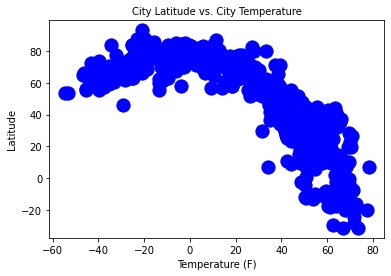

In [32]:
# Build a scatterplot for latitude vs Temperature
plt.scatter(weather_data["Lat"], weather_data["Temperature"],s=175, color="blue")
plt.title("City Latitude vs. City Temperature", fontsize = 10)
plt.xlabel("Temperature (F)", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)


plt.savefig("../images/LatitudevsTemperature_Scatterplot.png")
plt.show()


## Latitude vs. Humidity Plot

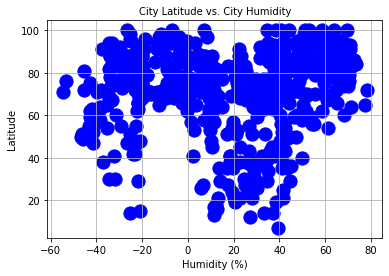

In [26]:
# Build a scatterplot for latitude vs Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"],s=175, color="blue")
plt.title("City Latitude vs. City Humidity", fontsize = 10)
plt.xlabel("Humidity (%)", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)
plt.grid(True)


plt.savefig("../images/LatitudevsHumidity_Scatterplot.png")
plt.show()

## Latitude vs. Cloudiness Plot

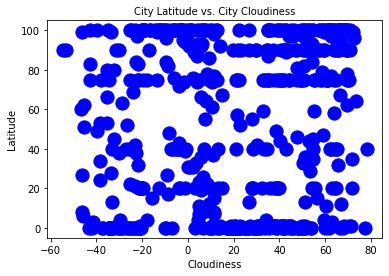

In [29]:
# Build a scatterplot for latitude vs Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],s=175, color="blue")
plt.title("City Latitude vs. City Cloudiness", fontsize = 10)
plt.xlabel("Cloudiness", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)
plt.grid=(True)

plt.savefig("../images/LatitudevsCloudiness_Scatterplot.png")
plt.show()

## Latitude vs. Wind Speed Plot

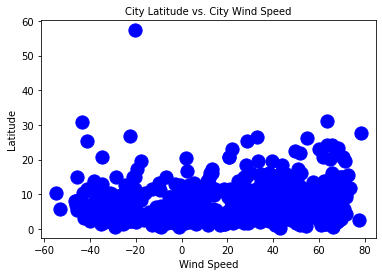

In [34]:
# Build a scatterplot for latitude vs Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"],s=175, color="blue")
plt.title("City Latitude vs. City Wind Speed", fontsize = 10)
plt.xlabel("Wind Speed", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

plt.savefig("../images/Latitudevswind_speed_Scatterplot.png")
plt.show()

## Linear Regression

In [36]:
Northhem_df = weather_data.loc[weather_data['Lat'] > 0] 
Northhem_df.head()

,Lat,Lng,Temperature,Cloudiness,Country,Date,Humidity,Temperature Max,Wind Speed,City Number,City Name
0,50.6996,-127.4199,44.60,75,CA,1614991545,87,44.60,5.75,6111862,Port Hardy
8,7.9986,124.2928,80.01,100,PH,1614991547,77,80.01,3.00,1701054,Marawi
9,67.8006,130.4114,-19.91,0,RU,1614991547,74,-19.91,2.08,2027042,Batagay-Alyta
10,66.5000,25.7167,12.20,0,FI,1614991548,79,12.20,10.36,638936,Rovaniemi
11,42.6001,-73.9662,26.91,100,US,1614991548,54,28.00,1.99,5106841,Albany


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

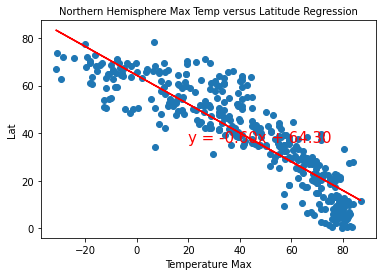

In [40]:
# Linear Regression
x_values = Northhem_df['Temperature Max']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Max Temp versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Temperature Max')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_North_MaxTemp_Latitude.png')
print()
plt.show()

In [38]:
Southhem_df = weather_data.loc[weather_data['Lat'] < 0] 
Southhem_df.head()

,Lat,Lng,Temperature,Cloudiness,Country,Date,Humidity,Temperature Max,Wind Speed,City Number,City Name
1,-53.1500,-70.9167,53.60,90,CL,1614991545,76,53.60,5.75,3874787,Punta Arenas
2,-20.3428,57.7575,75.20,20,MU,1614991545,88,75.20,3.44,1106677,Bambous Virieux
3,-22.9661,-42.0278,80.29,100,BR,1614991329,83,80.29,5.28,3471451,Arraial do Cabo
4,-34.5322,20.0403,60.80,0,ZA,1614991546,94,60.80,4.61,1015776,Bredasdorp
5,-34.4187,19.2345,68.00,0,ZA,1614991389,82,68.00,7.00,3366880,Hermanus


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

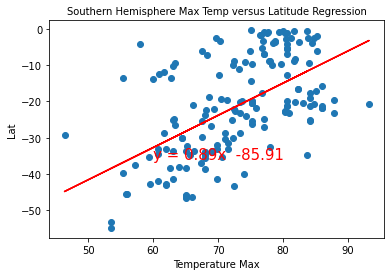

In [44]:
# Linear Regression
x_values = Southhem_df['Temperature Max']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Max Temp versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,-36), fontsize=15,color="red")
plt.xlabel('Temperature Max')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_MaxTemp_Latitude.png')
print()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

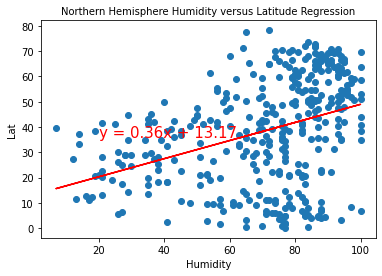

In [45]:
# Linear Regression
x_values = Northhem_df['Humidity']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Humidity versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_North_Humidity_Latitude.png')
print()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

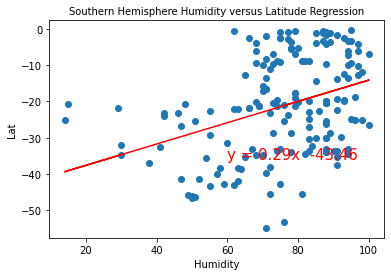

In [46]:
# Linear Regression
x_values = Southhem_df['Humidity']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Humidity versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,-36), fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_Humidity_Latitude.png')
print()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

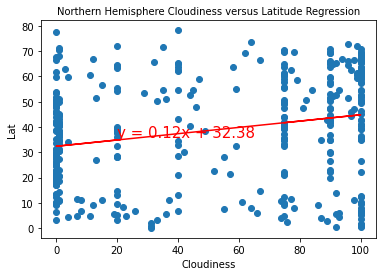

In [47]:
# Linear Regression
x_values = Northhem_df['Cloudiness']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Cloudiness versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_North_Cloudiness_Latitude.png')
print()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

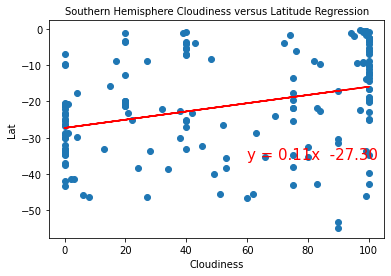

In [48]:
# Linear Regression
x_values = Southhem_df['Cloudiness']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Cloudiness versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,-36), fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_Cloudiness_Latitude.png')
print()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

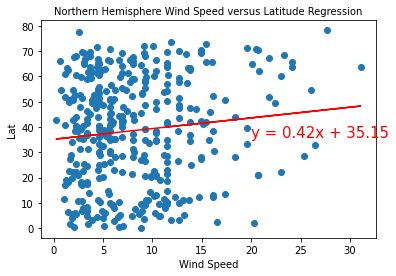

In [49]:
# Linear Regression
x_values = Northhem_df['Wind Speed']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Wind Speed versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_Northern Hemisphere_Wind_Speed_Latitude.png')
print()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

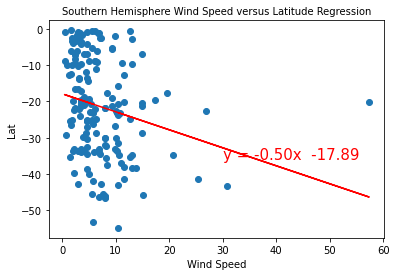

In [51]:
# Linear Regression
x_values = Southhem_df['Wind Speed']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Wind Speed versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30,-36), fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_Wind_Speed_Latitude.png')
print()
plt.show()